# 1. 为什么要用线性代数

对于机器学习来说，线性代数可能是所有需要了解的数学知识中最为重要的一个。正是因为采用了线性代数，计算机才能快又好的运行神经网络，也正是采用了线性代数这种计算方式，我们才会一路推高显卡的价格，造就“显卡危机”。

在大学里我们基本都学过线性代数这一课，不知道有多少人能从大学的课堂上学到线性代数的本质，并且能够了解线性代数这一门课可以解决一些什么实际的问题。至少对于我来说，线性代数在当时只是一门需要我考试通过的课程，我需要做到的就是会解题，通过考试就可以了，而其具体用处老师没有说过，我也没有去查过。

对于我们大多数人来说，线性代数一直以来都是遥远的，在我们的生活中并不会存在太多交集的学课，但是现在我们要学习机器学习是怎么一回事，学习计算机怎么训练模型，这其中就真真切切的用上了线性代数的知识，在我们开始前需要建议先阅读一下[神经网络是怎样运行的](../Part_2_Theory/Begining From Nerual Network.ipynb)，这样我们就能够一步步的了解到为什么在机器学习中会用上线性代数。


# 2. 线性代数的几个基本概念

在线性代数中，我们使用线性方程来表示数据，并将它们写成矩阵或向量的形式。因此我们基本都是在与矩阵还有向量打交道，当然在Python中我们其实有一个应用很广泛的库：**numpy**帮助我们，但是在这里我们还是主要介绍一些线性代数中的基本概念以及常用计算。


## 2.1 标量(Scalar)

所谓标量就是一个简单的数，比如：$24$

我们一般用一个小写的变量名称表示，比如：$x$

## 2.2 向量(Vector)

向量是一个有序数组，能够写成一行或者一列的形式。

$ N = 
 \left[
 \begin{matrix}
   1 & 2 & 3 
  \end{matrix}
  \right] 
$ 或 $M =
 \left[
 \begin{matrix}
   1  \\
   4  \\
   6
  \end{matrix}
  \right] 
$

向量只包含一个索引，我们使用$N_2$代表第二个元素，即$2$，$M_3$可以代表第三个元素，即$6$。

## 2.3 矩阵（Matrix）

矩阵是一个有序的二维数组，比如下面这个矩阵就是一个$2 * 3$的矩阵，我们一般把$n$行 $m$ 列的矩阵称为这是一个$n * m$的矩阵。

$$ V = 
 \left[
 \begin{matrix}
   1 & 2 & 3 \\
   4 & 5 & 6 
  \end{matrix}
  \right] 
$$

对于矩阵来说我们可以使用两个索引来定位矩阵中的元素，比如$V_{2,1}$代表的就是第二行第一列的元素，即$4$。

## 2.4 张量（Tensor）

如果用学术一些的定义来描述张量就是：张量是基于向量和矩阵的推广，可以将标量视为零阶张量，矢量视为一阶张量，矩阵视为二阶张量。

这样说起来就简单，所谓标量，向量还有矩阵其实都是张量，区别在于这是一维的张量，二维张量还是三维张量。

# 3. 运算法则


## 3.1 向量基本运算

向量的相加

$$ 
 \left[
 \begin{matrix}
   a \\
   b 
  \end{matrix}
  \right]
  +
   \left[
 \begin{matrix}
   c \\
   d 
  \end{matrix}
  \right]
  =
   \left[
 \begin{matrix}
   a + c \\
   b + d 
   \end{matrix}
  \right]
$$

我们可以用数组来表示向量

In [1]:
x = [1, 2]
y = [3, 4]

向量的相加就可以定义为两个向量对应元素两两相加

In [2]:
def vector_add(v, w):
    """将每一个元素相加"""
    return [v_i + w_i 
                for v_i, w_i in zip(v, w)]

In [3]:
vector_add(x, y)

[4, 6]

同理，向量相减也可以很容易的定义出

In [4]:
def vector_subtract(v, w):
    """将元素两两相减"""
    return [v_i - w_i
                for v_i, w_i in zip(v, w)]

In [5]:
vector_subtract(x, y)

[-2, -2]

向量也可以与标量进行计算，如果在向量上加、减、乘、除一个标量，指的就是直接对象了中的每个元素进行数学运算：

$$ 
 \left[
 \begin{matrix}
   a \\
   b 
  \end{matrix}
  \right]
*
c
  =
   \left[
 \begin{matrix}
   a * c \\
   b * c 
   \end{matrix}
  \right]
$$

我们同样可以为其定义一个函数

In [6]:
def scalar_multiply(c, v):
    """c 为常数，v 为向量"""
    return [c * v_i for v_i in v]

In [7]:
c = 8
v = [5, 7]

scalar_multiply(c, v)

[40, 56]

## 3.2 矩阵的表达与运算

我们可以将矩阵理解为数组的数组，或者说一个二维数组，如果A是一个矩阵的话，那我们就可以用A\[i\]\[j\]来表示矩阵A中的第i行，第j列的元素。

In [1]:
A = [[1, 2, 3], # A 是一个2行3列的矩阵
        [4, 5, 6]]

B = [[1, 2], # B 是一个3行2列的矩阵
        [3, 4],
        [5, 6]]

如果给定一个矩阵，我们可以根据它的行数与第一行的列数从而知道其大小形状

In [2]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [3]:
shape(A)

(2, 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

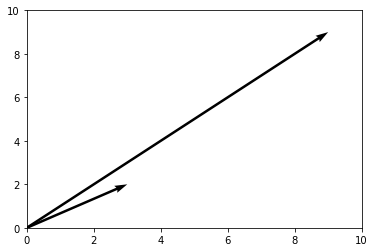

In [4]:
soa = np.array([[0, 0, 3, 2], [0, 0, 9, 9]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
plt.draw()
plt.show()